In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## We have give a data of all t20 matches , our objective is to explore PSL tournament visualize their data

In [2]:
# Reading our dataset 
data=pd.read_csv('t20_matches-checkpoint.csv')

## As we have many series played by many teams so we are calling omly PSL series. There are two tournaments with two different series IDs we are going to call them and cocatenate them to make a single dataset

In [3]:
df1=data[data["series_id"] == 923069]

In [4]:
df2=data[data["series_id"] ==  1075974]

In [5]:
data=pd.concat([df1,df2] , axis=0).reset_index()

In [6]:
data.shape

(48, 27)

In [7]:
data.columns

Index(['index', 'match_id', 'series_id', 'match_details', 'result', 'scores',
       'date', 'venue', 'round', 'home', 'away', 'winner', 'win_by_runs',
       'win_by_wickets', 'balls_remaining', 'innings1', 'innings1_runs',
       'innings1_wickets', 'innings1_overs_batted', 'innings1_overs',
       'innings2', 'innings2_runs', 'innings2_wickets',
       'innings2_overs_batted', 'innings2_overs', 'D/L_method', 'target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  48 non-null     int64  
 1   match_id               48 non-null     int64  
 2   series_id              48 non-null     int64  
 3   match_details          48 non-null     object 
 4   result                 48 non-null     object 
 5   scores                 48 non-null     object 
 6   date                   48 non-null     object 
 7   venue                  48 non-null     object 
 8   round                  48 non-null     object 
 9   home                   48 non-null     object 
 10  away                   48 non-null     object 
 11  winner                 48 non-null     object 
 12  win_by_runs            18 non-null     float64
 13  win_by_wickets         29 non-null     float64
 14  balls_remaining        29 non-null     float64
 15  innings1

In [9]:
data.isnull().sum()

index                     0
match_id                  0
series_id                 0
match_details             0
result                    0
scores                    0
date                      0
venue                     0
round                     0
home                      0
away                      0
winner                    0
win_by_runs              30
win_by_wickets           19
balls_remaining          19
innings1                  0
innings1_runs             0
innings1_wickets          0
innings1_overs_batted     0
innings1_overs            0
innings2                  1
innings2_runs             1
innings2_wickets          1
innings2_overs_batted     1
innings2_overs            1
D/L_method               46
target                   46
dtype: int64

In [10]:
# Total Matches Win by Batting First 
bat=data['win_by_runs'].count()
print(bat)

18


In [11]:
# Total Matches Win by Bowl First 

bowl=data['win_by_wickets'].count()
print(bowl)

29


In [12]:
dl_method=data.iloc[[24,33],:]

In [13]:
bat_dl=dl_method['win_by_runs'].count()

In [14]:
bowl_dl=dl_method['win_by_wickets'].count()

In [15]:
total_wins=bat+bat_dl
print("Total Matches Wins By Batting first: total_wins" )

Total Matches Wins By Batting first: total_wins


## Due to two of the mathced that had resulted by DL method out total Wins By Runs are 19 and Total Win By bowl First is 30  

# Maximum Number of Wins By Team with Batting First 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Islamabad United'),
  Text(1, 0, 'Karachi Kings'),
  Text(2, 0, 'Lahore Qalandars'),
  Text(3, 0, 'Peshawar Zalmi'),
  Text(4, 0, 'Quetta Gladiators')])

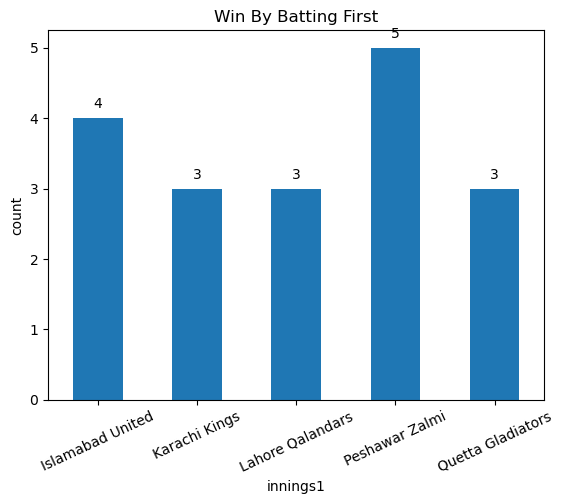

In [16]:
win_bat_first=data.groupby('innings1')['win_by_runs'].count().plot(kind='bar')
#plt.annotate("Max Wins" , xy=(3,5) , horizontalalignment = 'center' , verticalalignment='bottom')
for bar in win_bat_first.patches:
    height = bar.get_height()
    win_bat_first.text(
        bar.get_x() + bar.get_width() / 2,  
        height+0.1, f'{height}',ha='center',va='bottom',color='black',fontsize=10)

plt.xlabel('innings1')
plt.ylabel('count')
plt.title("Win By Batting First")
plt.xticks(rotation=25)

## Peshawar Zalmi Won Most Matches By Batting First 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Islamabad United'),
  Text(1, 0, 'Karachi Kings'),
  Text(2, 0, 'Lahore Qalandars'),
  Text(3, 0, 'Peshawar Zalmi'),
  Text(4, 0, 'Quetta Gladiators')])

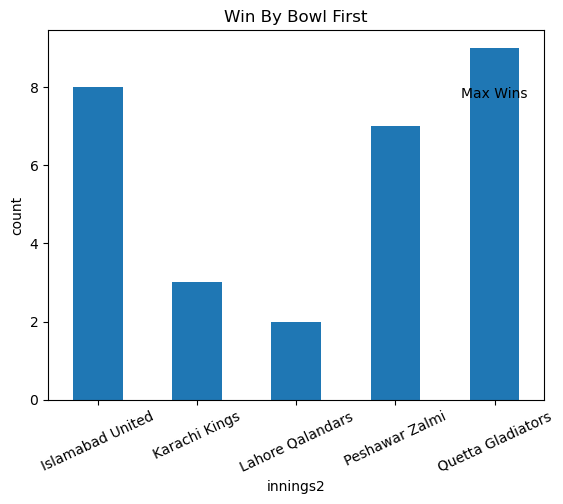

In [17]:
win_bowl_first=data.groupby('innings2')['win_by_wickets'].count().plot(kind='bar')
plt.annotate('Max Wins',xy=(4,8) , horizontalalignment='center' , verticalalignment='top')
plt.xlabel('innings2')
plt.ylabel('count')
plt.title("Win By Bowl First")
plt.xticks(rotation=25)

In [18]:
## Maximum number of Wins by Team with bowling first is Quetta Gladiator

In [19]:
batting_first=data.groupby('innings1')['win_by_runs'].count()
print(batting_first)

innings1
Islamabad United     4
Karachi Kings        3
Lahore Qalandars     3
Peshawar Zalmi       5
Quetta Gladiators    3
Name: win_by_runs, dtype: int64


In [20]:
bowl_first=data.groupby('innings2')['win_by_wickets'].count()
bowl_first

innings2
Islamabad United     8
Karachi Kings        3
Lahore Qalandars     2
Peshawar Zalmi       7
Quetta Gladiators    9
Name: win_by_wickets, dtype: int64

In [21]:
bowl_first=pd.DataFrame(bowl_first).reset_index()

In [22]:
batting_first=pd.DataFrame(batting_first).reset_index()

In [23]:
win_analy=pd.concat([batting_first,bowl_first] , axis = 1)

In [24]:
win_analy

,innings1,win_by_runs,innings2,win_by_wickets
0,Islamabad United,4,Islamabad United,8
1,Karachi Kings,3,Karachi Kings,3
2,Lahore Qalandars,3,Lahore Qalandars,2
3,Peshawar Zalmi,5,Peshawar Zalmi,7
4,Quetta Gladiators,3,Quetta Gladiators,9


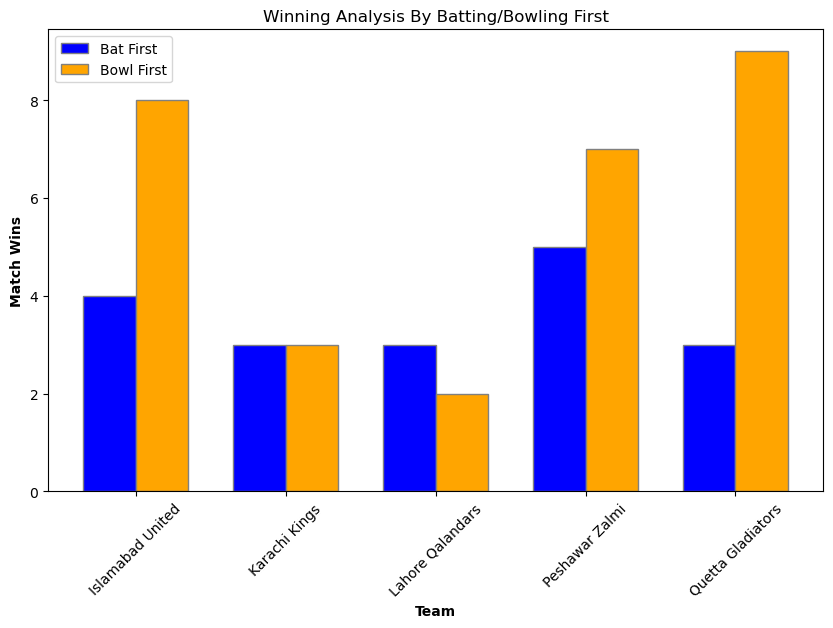

In [25]:
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(win_analy))
r2 = [x + bar_width for x in r1]

# Plotting innings1
plt.bar(r1, win_analy['win_by_runs'], color='blue', width=bar_width, edgecolor='grey', label='Bat First')

# Plotting innings2
plt.bar(r2, win_analy['win_by_wickets'], color='orange', width=bar_width, edgecolor='grey', label='Bowl First')
plt.xlabel('Team', fontweight='bold')
plt.ylabel('Match Wins', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(win_analy))], win_analy['innings1'], rotation=45)
plt.title('Winning Analysis By Batting/Bowling First')
plt.legend()
plt.show()

In [26]:
filtered_data=data.loc[data['innings1'] > data['innings2'],['win_by_runs','innings1', 'innings2']].value_counts()


In [27]:
bat_first_result = []
for index, value in filtered_data.items():
    innings1 = index[1]
    win_by_runs = index[0]
    against = index[2]
    bat_first_result.append(f"Matches where {innings1} batted First and win by {win_by_runs} runs agaianst {against} team")  
    

In [28]:
bat_first_result

['Matches where Quetta Gladiators batted First and win by 1.0 runs agaianst Peshawar Zalmi team',
 'Matches where Peshawar Zalmi batted First and win by 3.0 runs agaianst Karachi Kings team',
 'Matches where Lahore Qalandars batted First and win by 7.0 runs agaianst Karachi Kings team',
 'Matches where Quetta Gladiators batted First and win by 8.0 runs agaianst Lahore Qalandars team',
 'Matches where Peshawar Zalmi batted First and win by 17.0 runs agaianst Lahore Qalandars team',
 'Matches where Peshawar Zalmi batted First and win by 24.0 runs agaianst Islamabad United team',
 'Matches where Peshawar Zalmi batted First and win by 24.0 runs agaianst Karachi Kings team',
 'Matches where Karachi Kings batted First and win by 44.0 runs agaianst Islamabad United team']

In [29]:
filtered2_data=data.loc[data['innings2'] > data['innings1'],['win_by_wickets', 'innings2']].value_counts()


In [30]:
bowl_first_result=[]
for index , value in filtered2_data.items():
    
    win_by_wickets = index[0]
    innings2 = index[1]
    bowl_first_result.append(f' {innings2} wins by {win_by_wickets} wicket .')

In [31]:
bowl_first_result

[' Quetta Gladiators wins by 5.0 wicket .',
 ' Peshawar Zalmi wins by 7.0 wicket .',
 ' Quetta Gladiators wins by 7.0 wicket .',
 ' Quetta Gladiators wins by 8.0 wicket .',
 ' Lahore Qalandars wins by 1.0 wicket .',
 ' Quetta Gladiators wins by 2.0 wicket .',
 ' Peshawar Zalmi wins by 3.0 wicket .',
 ' Quetta Gladiators wins by 3.0 wicket .',
 ' Peshawar Zalmi wins by 5.0 wicket .',
 ' Karachi Kings wins by 6.0 wicket .',
 ' Lahore Qalandars wins by 6.0 wicket .',
 ' Quetta Gladiators wins by 6.0 wicket .',
 ' Peshawar Zalmi wins by 9.0 wicket .']

In [32]:
fisrt_innings_wins=pd.DataFrame(filtered_data).reset_index()
fisrt_innings_wins

,win_by_runs,innings1,innings2,count
0,1.0,Quetta Gladiators,Peshawar Zalmi,2
1,3.0,Peshawar Zalmi,Karachi Kings,1
2,7.0,Lahore Qalandars,Karachi Kings,1
3,8.0,Quetta Gladiators,Lahore Qalandars,1
4,17.0,Peshawar Zalmi,Lahore Qalandars,1
5,24.0,Peshawar Zalmi,Islamabad United,1
6,24.0,Peshawar Zalmi,Karachi Kings,1
7,44.0,Karachi Kings,Islamabad United,1


In [33]:
teams = ['Karachi Kings' , 'Quetta Gladiators' , 'Lahore Qalandars' , 'Peshawar Zalmi' , 'Islamabad United']

In [34]:
for i in teams:
    for j in teams:
                win = data[(data['innings2'] == i) & (data['winner'] == i) &
                         (data['innings1'] == j) ].shape[0]
                playd = data[(data['innings2'] == i) &
                           (data['innings1'] == j) ].shape[0]
                
                if playd != 0:
                     
                     print(f'{i} Win {win*100/playd : .2f}% when bowled first against {j} :     " Won = {win} Played = {playd} "')
    print('\n')    
       

Karachi Kings Win  66.67% when bowled first against Lahore Qalandars :     " Won = 2 Played = 3 "
Karachi Kings Win  0.00% when bowled first against Peshawar Zalmi :     " Won = 0 Played = 2 "
Karachi Kings Win  66.67% when bowled first against Islamabad United :     " Won = 2 Played = 3 "


Quetta Gladiators Win  100.00% when bowled first against Karachi Kings :     " Won = 4 Played = 4 "
Quetta Gladiators Win  66.67% when bowled first against Lahore Qalandars :     " Won = 2 Played = 3 "
Quetta Gladiators Win  50.00% when bowled first against Peshawar Zalmi :     " Won = 1 Played = 2 "
Quetta Gladiators Win  66.67% when bowled first against Islamabad United :     " Won = 2 Played = 3 "


Lahore Qalandars Win  0.00% when bowled first against Karachi Kings :     " Won = 0 Played = 1 "
Lahore Qalandars Win  0.00% when bowled first against Quetta Gladiators :     " Won = 0 Played = 1 "
Lahore Qalandars Win  0.00% when bowled first against Peshawar Zalmi :     " Won = 0 Played = 1 "
Lahor

In [89]:
for i in teams:
    total_matches = data[(data['innings1'] == i) | (data['innings2'] == i)]['result'].count()
    matches_won = data[data['winner'] == i]['result'].count()
    win_percent = (matches_won / total_matches * 100)
    print(f"{i}: Total Matches = {total_matches}, Wins = {matches_won}, Win Percentage = {win_percent: .2f}%")
    

Karachi Kings: Total Matches = 19, Wins = 7, Win Percentage =  36.84%
Quetta Gladiators: Total Matches = 19, Wins = 12, Win Percentage =  63.16%
Lahore Qalandars: Total Matches = 16, Wins = 5, Win Percentage =  31.25%
Peshawar Zalmi: Total Matches = 21, Wins = 12, Win Percentage =  57.14%
Islamabad United: Total Matches = 20, Wins = 11, Win Percentage =  55.00%


In [63]:
df=pd.DataFrame(dic).T

In [64]:
df

,Matches,Won,Win%
Karachi Kings,19.0,7.0,36.842105
Quetta Gladiators,19.0,12.0,63.157895
Lahore Qalandars,16.0,5.0,31.250000
Peshawar Zalmi,21.0,12.0,57.142857
Islamabad United,20.0,11.0,55.000000


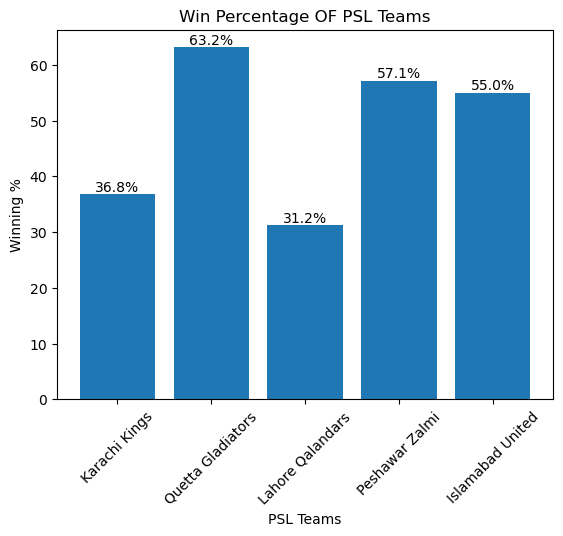

In [88]:
bars=plt.bar(teams,df['Win%']) 
plt.xticks(rotation=45)
plt.title("Win Percentage OF PSL Teams")
plt.xlabel("PSL Teams")
plt.ylabel("Winning %")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


## Quetta Gladiator has the most Win Percentage 

In [92]:
for i in teams:
    total_matches = data[(data['innings1'] == i) | (data['innings2'] == i)]['result'].count()
    matches_won = data[data['winner'] == i]['win_by_wickets'].count()
    win_percent = (matches_won / total_matches * 100)
    print(f"{i}: Total Matches = {total_matches}, Wins = {matches_won}, Win Percentage = {win_percent: .2f}%")
    

Karachi Kings: Total Matches = 19, Wins = 3, Win Percentage =  15.79%
Quetta Gladiators: Total Matches = 19, Wins = 9, Win Percentage =  47.37%
Lahore Qalandars: Total Matches = 16, Wins = 2, Win Percentage =  12.50%
Peshawar Zalmi: Total Matches = 21, Wins = 7, Win Percentage =  33.33%
Islamabad United: Total Matches = 20, Wins = 8, Win Percentage =  40.00%
